# Short Term Weather Forecasting with Single Shot Method

Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [61]:
df=pd.read_csv('../dataset_for_analysis/data_weather_new.csv',parse_dates=['date'])

## Normalization and modeling

Define the features and the targeted variables to be predicted

In [62]:
X=df[['cloud_cover','sunshine','global_radiation','pressure']]
Y=df[['mean_temp','precipitation','min_temp','max_temp']]

Initiate the Standard Scaler

In [63]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

## Single output

### Predict mean_temp

Use GridSearch method to determine

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the value of the parameters in the grid
param_grid = {
    'max_depth': range(0,20),
    'min_samples_split': range(0,40),
    'min_samples_leaf': range(0,20)
}

tree_model = DecisionTreeRegressor()

# Use grid search method to find the best combination of the parameters
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

# Output the results
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best Parameters: ", best_params)
print("Best Score (MSE): ", best_score)

In [75]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the parameter grid to search over
param_grid = {
    'C': [19,20,21],
    'gamma': [0.1, 'scale','auto']
}

# Initialize the Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

# Define the SVR model
svr = SVR()

# Create GridSearchCV instance with TimeSeriesSplit as cross-validation
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=tscv)

# Split the training set and test set
X=df[['cloud_cover', 'sunshine', 'global_radiation', 'pressure']]
Y=df['mean_temp']

X_scaled = scaler.fit_transform(X)

# Fit the grid search to the data
grid_search.fit(X_scaled, Y)

# Print the results
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best Parameters: ", best_params)
print("Best Score (MSE): ", best_score)


Best Parameters:  {'C': 21, 'gamma': 0.1}
Best Score (MSE):  15.07157559283535


Use cross validation method to train and evaluate the models

In [65]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Initiate the Time Series Split
tscv=TimeSeriesSplit(n_splits=5)

# Train the models
for target_variable,model in models.items():

    # Store the mse value
    mse_scores=[]

    # Split the training set and test set
    for train_index,test_index in tscv.split(df):
        X_train=X.iloc[train_index]
        y_train=Y[target_variable].iloc[train_index]

        X_test=X.iloc[test_index]
        y_test=Y[target_variable].iloc[test_index]

        # Normalize the data
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.fit_transform(X_test)

        # Train the model
        model.fit(X_train,y_train)

        # Make the predictions
        y_pred=model.predict(X_test)

        # Calculate the mean squared error
        mse=mean_squared_error(y_test,y_pred)
        mse_scores.append(mse)

    # Print the result
    print(f'MSE of {target_variable} prediction: {np.mean(mse_scores): .3f}')

MSE of mean_temp prediction:  15.049
MSE of precipitation prediction:  12.817
MSE of min_temp prediction:  15.986
MSE of max_temp prediction:  17.566


Predict the data in 2020

In [40]:
# Predict the mean_temp in 2020
data_2020=df[df['date'].dt.year==2020]
X_2020=data_2020[['cloud_cover','sunshine','global_radiation','pressure']].values
scaled_X_2020=scaler.fit_transform(X_2020)
mean_temp_2020_pred=models['mean_temp'].predict(scaled_X_2020)
precipitation_2020_pred=models['precipitation'].predict(scaled_X_2020)
min_temp_2020_pred=models['min_temp'].predict(scaled_X_2020)
max_temp_2020_pred=models['max_temp'].predict(scaled_X_2020)

print(f"MSE of mean_temp: {mean_squared_error(data_2020['mean_temp'],mean_temp_2020_pred): .3f}")
print(f"MSE of precipitation: {mean_squared_error(data_2020['precipitation'],precipitation_2020_pred): .3f}")
print(f"MSE of min_temp: {mean_squared_error(data_2020['min_temp'],min_temp_2020_pred): .3f}")
print(f"MSE of max_temp: {mean_squared_error(data_2020['max_temp'],max_temp_2020_pred): .3f}")


MSE of mean_temp:  15.598
MSE of precipitation:  13.036
MSE of min_temp:  17.267
MSE of max_temp:  18.485


Visualize the result

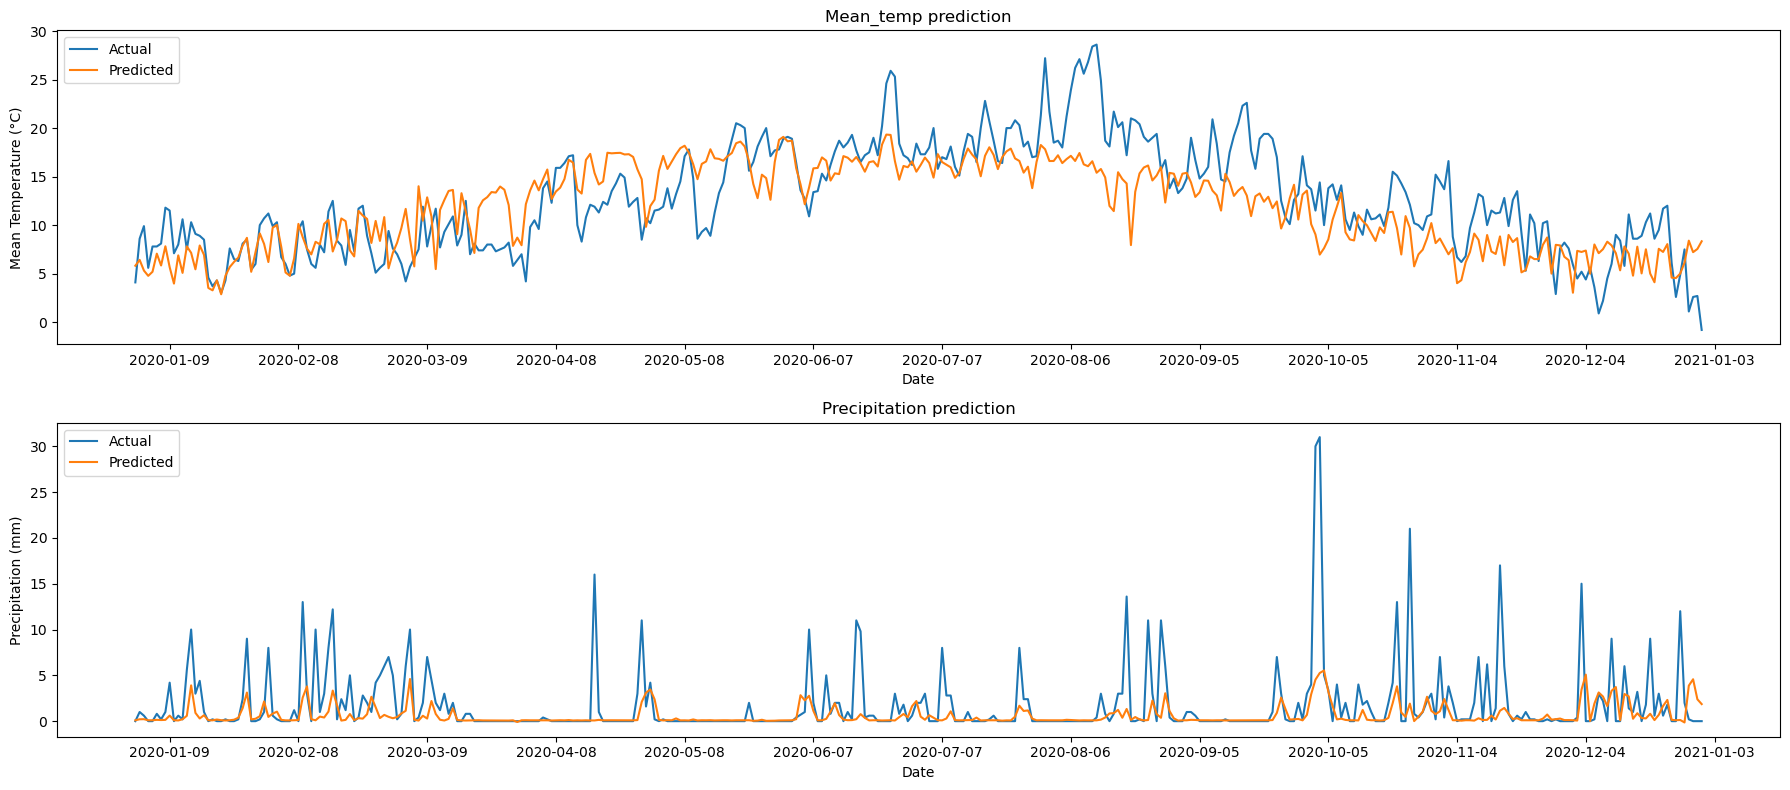

In [42]:

# Create the figure containing two subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,8))

# The plot for mean_temp
ax1.plot(data_2020['date'],data_2020['mean_temp'],label='Actual')
ax1.plot(data_2020['date'],mean_temp_2020_pred, label='Predicted')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Mean_temp prediction')
ax1.legend(loc='upper left')

# The plot for precipitation
ax2.plot(data_2020['date'], data_2020['precipitation'],label='Actual')
ax2.plot(data_2020['date'], precipitation_2020_pred,label='Predicted')
ax2.set_xlabel('Date')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Precipitation prediction')
ax2.legend(loc='upper left')

ax1.xaxis.set_major_locator(plt.MaxNLocator(14))
ax2.xaxis.set_major_locator(plt.MaxNLocator(14))

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

## Multiple output

Train and test the model

In [57]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

# Define the SVR model
svr = SVR()
model = MultiOutputRegressor(svr)

# Define the parameter grid to search over
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [0.1, 1]  # Add gamma values here
}

# Create GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error')

mse_scores = []

for train_index, test_index in tscv.split(df):
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]

    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]

    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the grid search to the data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make the predictions
    y_pred = best_model.predict(X_test_scaled)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print the result
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'MSE of prediction: {np.mean(mse_scores):.2f}')


Best hyperparameters: {'estimator__C': 10, 'estimator__gamma': 0.1}
MSE of prediction: 15.42


In [59]:
from sklearn.multioutput import MultiOutputRegressor

svr=SVR()
model=MultiOutputRegressor(svr)

mse_scores1=[]

for train_index,test_index in tscv.split(df):
    X_train=X.iloc[train_index]
    y_train=Y.iloc[train_index]

    X_test=X.iloc[test_index]
    y_test=Y.iloc[test_index]

    # Normalize the data
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.fit_transform(X_test)

    # Train the model
    model.fit(X_train,y_train)

    # Make the predictions
    y_pred=model.predict(X_test)

    # Calculate the mean squared error
    mse=mean_squared_error(y_test,y_pred)
    mse_scores1.append(mse)

# Print the result
print(f'MSE of prediction: {np.mean(mse_scores1): .2f}')

MSE of prediction:  15.35


Predict the data in 2020

In [52]:
y_pred_2020_multi=model.predict(scaled_X_2020)
print(f"MSE for multiple output of 2020 data: {mean_squared_error(data_2020[['mean_temp','precipitation','min_temp','max_temp']].values,y_pred_2020_multi): .3f}")

MSE for multiple output of 2020 data:  16.096
